In [70]:
%matplotlib inline

import numpy as np
import pandas as pd
from code.geo import *
import matplotlib.pyplot as plt

In [2]:

citycenter = (37.77, -122.454)
print 'SEDAC res: 2.5 arcmin = ', 2.5/60, 'degrees'

d = 16000
print 'in distance: %d feet = %6.4f degrees = %3.2f miles' % (d, distance_to_angle(citycenter, d, 0)[0], d/5280.)

d = 500
print 'walkscore res: %d feet = %6.4f degrees = %3.2f miles' % (d, distance_to_angle(citycenter, d, 0)[0], d/5280.)

SEDAC res: 2.5 arcmin =  0.0416666666667 degrees
in distance: 16000 feet = 0.0439 degrees = 3.03 miles
walkscore res: 500 feet = 0.0014 degrees = 0.09 miles


(100, 6)


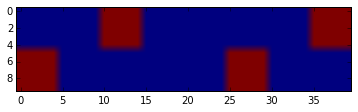

In [72]:
coords = np.arange(1, 11)
g = np.meshgrid(coords, coords)

gdf = pd.DataFrame({'nodex': g[0].ravel(), 'nodey': g[1].ravel()})

gdf['f1'] = np.r_[np.tile(np.repeat([0,1], [5,5]), 5), np.zeros(50)]
gdf['f2'] = np.r_[np.tile(np.repeat([1,0], [5,5]), 5), np.zeros(50)]
gdf['f3'] = np.r_[np.zeros(50), np.tile(np.repeat([0,1], [5,5]), 5)]
gdf['f4'] = np.r_[np.zeros(50), np.tile(np.repeat([1,0], [5,5]), 5)]

print gdf.shape
plt.imshow(pd.pivot_table(gdf, index='nodex', columns='nodey'))


In [64]:
np.r_[np.tile(np.repeat([0,1], [5,5]), 5), np.zeros(50)]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [9]:
def find_neib(x, y):
    neibs = [[x + 1, y],
             [x - 1, y],
             [x, y + 1],
             [x, y - 1]]
    return np.array(neibs)
find_neib(2, 2)

array([[3, 2],
       [1, 2],
       [2, 3],
       [2, 1]])

In [37]:
edges = pd.DataFrame()

for row in gdf.index:
    x = gdf.iloc[row, 0]
    y = gdf.iloc[row, 1]
    neib = find_neib(x, y)
    newdf = np.vstack((x*np.ones(4),
                       y*np.ones(4),
                       neib.T)).T
    edges = pd.concat((edges, pd.DataFrame(newdf)))
edges.columns = ['nodex', 'nodey', 'nx', 'ny']

print edges.shape
edges

(400, 4)


,nodex,nodey,nx,ny
0,1,1,2,1
1,1,1,0,1
2,1,1,1,2
3,1,1,1,0
0,2,1,3,1
1,2,1,1,1
2,2,1,2,2
3,2,1,2,0
0,3,1,4,1
1,3,1,2,1


In [25]:
row = 2
np.vstack((gdf.iloc[row, 0]*np.ones(4),
                      gdf.iloc[row, 1]*np.ones(4)))

array([[ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])